### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.

# Assignment 3: Classification with Logistic Regression  [ __ /100  marks]


In this assignment we will use the `diabetes` dataset, which was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. 

We will use logistic regression to predict whether subjects have diabetes or not.

## Global Toolbox

In [97]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
seed=0

## Question 1.1 [ _ /3 marks]

Read the file `diabetes.csv` into a pandas DataFrame. Display the first 5 rows of the DataFrame. 

In [98]:
# ****** your code here ******
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Question 1.2 [ _ /6 marks]

(1) How many classes are there? How many features are available to predict the outcome?

**Your answer**: 
There are two classes: 0 if the patient does not have diabetes and 1 if the patient does have diabetes.

There are 8 features available to predict the outcome: pregnancies, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age.

(2) Is the dataset class-balanced?

In [99]:
# ****** your code here ******
# Number of rows with outcome 1
positive = df[df['Outcome'] == 1].shape[0]
print('Outcome = 1: '+ str(positive))

# Number of rows with outcome 0
negative = df[df['Outcome'] == 0].shape[0]
print('Outcome = 0: '+ str(negative))

Outcome = 1: 268
Outcome = 0: 500


**Your answer**: 
No, the dataset is not class balanced as there are significantly more negative outcomes than there are positive outcomes.

(3) For this classification problem, what is the baseline accuracy and how would you interpret it? Round into 3 decimal place.

In [100]:
# ****** your code here ******
baseline_accuracy = negative / (positive + negative)
print("Baseline Accuracy is: {:.3f}".format(baseline_accuracy))

Baseline Accuracy is: 0.651


I interpret the baseline accuracy of 0.651 as the floor for a successful model to beat. If a model can't outperform this baseline accuracy, then it is doing worse than if it were to not even attempt to fit the data.

Additionally, a baseline accuracy significantly above 0.5 indicates that the dataset is not class balanced.

## Question 1.3 [ _ /3 marks]

Use `train_test_split` with `random_state=0` to split the data into training and test sets. Leave `20%` for testing.

In [101]:
# Store all the features into variable "X"
# ****** your code here ******
X = df.drop('Outcome', axis='columns')

# Store the output class values into variable "y" 
# ****** your code here ******
y = df.Outcome.values

# Split your X and y data using train_test_split 
# ****** your code here ******
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=0)

## Question 2.1 [ _ /3 marks]

We will use sklearn's `LogisticRegression` to solve the classification problem. Before we move on, answer the following questions by reading the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).


(1) Does `LogisticRegression` use a penalty by default?  If yes, what penalty?

**Your answer**: 
Yes, by default is uses L2 penalty.

    
(2) If we apply a penalty during learning, what difference do you expect to see in the resulting coefficients (parameters), relative to not applying a penalty during learning?

**Your answer**: 
The coefficients are expected to be smaller - a penalty works by ensuring there is a smaller range of values in the resulting coefficients. It does this by penalizing extreme values more than less extreme values.

    
(3) If using the default settings of `LogisticRegression`, do you need to include a column of 1s in your feature/design matrix? Briefly explain why or why not.

**Your answer**: 
You do not. By defualt, it sets the fit_intercept parameter to True. If this parameter were set to False, it would not automatically add a column of 1s and they would need to be added.

## Question 2.2 [ _ /10 marks]

Create a `LogisticRegression` model with `penalty=none`. Let's fisrt train and test this classifier using only "Insulin" as the input feature. Make a scatter plot of the points. Plot your prediction on the same graph.

c:\Users\Riley\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


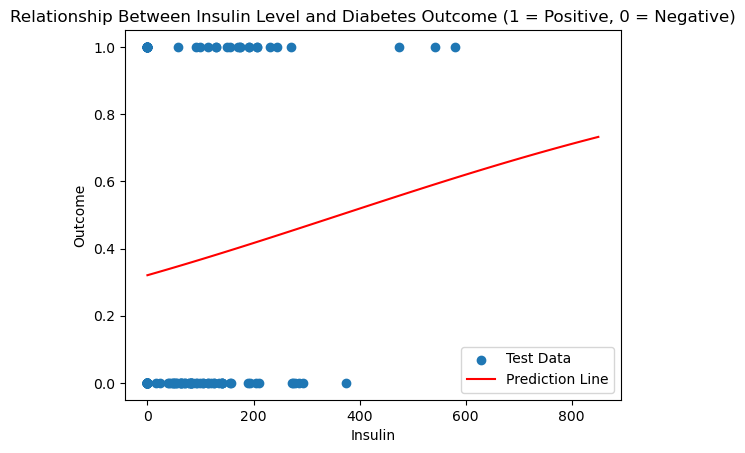

In [102]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
noPenaltyInsulin = LogisticRegression(penalty=None, random_state=0)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
noPenaltyFitInsulin = noPenaltyInsulin.fit(Xtrain[['Insulin']], ytrain)

# Create a scatter plot of the test data. 
# ****** your code here ******
plt.scatter(Xtest[['Insulin']], ytest)
plt.xlabel('Insulin')
plt.ylabel('Outcome')
plt.title('Relationship Between Insulin Level and Diabetes Outcome (1 = Positive, 0 = Negative)')

# Also plot your prediction using sns.lineplot
# lineplot needs 1d vector xplot
xplot = np.linspace(0, 850, 100)
yplot = noPenaltyFitInsulin.predict_proba(xplot.reshape(-1, 1))[:,1]
sns.lineplot(x=xplot, y=yplot, color='r')
plt.legend(['Test Data', 'Prediction Line'], loc='lower right')

## Question 2.3 [ _ /10 marks]
Evaluate the classification performance using `Accuracy`, `Recall`, `Precision`, `Sensitivity` and `Specificity`.

In [103]:
# ****** your code here ******
# You can either write a function or not

# Taken from Lab for Week 4 (because it is convenient)
def compute_performance(yhat, y, classes):
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
    
compute_performance(noPenaltyFitInsulin.predict(Xtest[['Insulin']]), ytest, noPenaltyInsulin.classes_)


tp: 3 tn: 106 fp: 1 fn: 44
Accuracy: 0.708 Recall: 0.064 Precision: 0.75 Sensitivity: 0.064 Specificity: 0.991


## Question 3.1 [ _ /10 marks]

Create another `LogisticRegression` model with `penalty=none`. Train and test this classifier with all features and then evaluate the performance.

In [104]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
noPenaltyLr = LogisticRegression(penalty=None, max_iter=1000, random_state=0)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
noPenaltyFit = noPenaltyLr.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
yhat = noPenaltyFit.predict(Xtest)

# Evaluate the performance
# ****** your code here ******
compute_performance(yhat, ytest, noPenaltyLr.classes_)

tp: 29 tn: 98 fp: 9 fn: 18
Accuracy: 0.825 Recall: 0.617 Precision: 0.763 Sensitivity: 0.617 Specificity: 0.916


Does using more features help to improve the classification?

**Your answer** : 
Yes, more features improves the classification. This means that the additional features are beneficial in classifying diabetes with this dataset.

Differences in values:
- Accuracy: 0.825 compared to 0.708 in insulin-only
- Recall: 0.617 compared to 0.064 in insulin-only
- Precision: 0.763 compared to 0.75 in insulin-only
- Sensitivity: 0.617 compared to 0.064 in insulin-only
- Specificity: 0.916 compared to 0.991 in insulin-only

## Question 3.2 [ _ /10 marks]
Let's adjust the decision threshold from 0.5 (default) to 0.4 and 0.6, and then evlaute the performance.

In [105]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.4
ytest_prob = noPenaltyFit.predict_proba(Xtest)
yhat = noPenaltyFit.classes_[(ytest_prob[:,1] >= threshold).astype(int)]

# Evaluate the performance
# ****** your code here ******
compute_performance(yhat, ytest, noPenaltyLr.classes_)


tp: 34 tn: 88 fp: 19 fn: 13
Accuracy: 0.792 Recall: 0.723 Precision: 0.642 Sensitivity: 0.723 Specificity: 0.822


In [106]:
# Using your classifer from last question, adjust the decision threshold and get the updated predictions 
# ****** your code here ******
threshold = 0.6
ytest_prob = noPenaltyFit.predict_proba(Xtest)
yhat = noPenaltyFit.classes_[(ytest_prob[:,1] >= threshold).astype(int)]

# Evaluate the performance
# ****** your code here ******
compute_performance(yhat, ytest, noPenaltyLr.classes_)

tp: 26 tn: 100 fp: 7 fn: 21
Accuracy: 0.818 Recall: 0.553 Precision: 0.788 Sensitivity: 0.553 Specificity: 0.935


What do you think is a better threshold? 

**Your answer**: 
I think that 0.6 is a better threshold. This threshold overall results in less false positives and false negatives cumulatively than 0.4 (28 vs 32).

With more data points in our test set we would be able to be even more conclusive about the results (>=500 samples would be ideal)

## Question 3.3 [ _ /10 marks]

Create a final `LogisticRegression` model with `penalty=l2`, `C=0.01`. Train and test this classifier with all features and then evaluate the performance.

In [107]:
# Create a LogisticRegression model without regularization 
# ****** your code here ******
penaltyLr = LogisticRegression(penalty='l2', max_iter=1000, random_state=0, C=0.01)

# Fit to your training data using Logistic Regression 
# ****** your code here ******
penaltyFit = penaltyLr.fit(Xtrain, ytrain)

# Compute your test predictions, given test inputs 
# ****** your code here ******
yhat = penaltyFit.predict(Xtest)

# Evaluate the performance
# ****** your code here ******
compute_performance(yhat, ytest, penaltyLr.classes_)


tp: 28 tn: 97 fp: 10 fn: 19
Accuracy: 0.812 Recall: 0.596 Precision: 0.737 Sensitivity: 0.596 Specificity: 0.907


Does regularization help to improve the classification?

**Your answer** : 

Without regularization, these are the results:
Accuracy: 0.708 Recall: 0.064 Precision: 0.75 Sensitivity: 0.064 Specificity: 0.991

Regularization does improve the classification.
- Accuracy: 0.81 vs 0.71
- Recall: 0.60 vs 0.06
- Precision: 0.74 vs 0.75
- Sensitivity: 0.60 vs 0.06
- Specificity: 0.91 vs 0.99

## Question 4 [ _ /15 marks]

Plot ROC Curves for the classifiers you used in questions 2.2, 3.1, and 3.3. Use AUC to determine which classifier is the best.

AUC for No Penalty Insulin: 0.5365963179164797
AUC for No Penalty: 0.8312205680863067
AUC for Penalty: 0.826096968440929


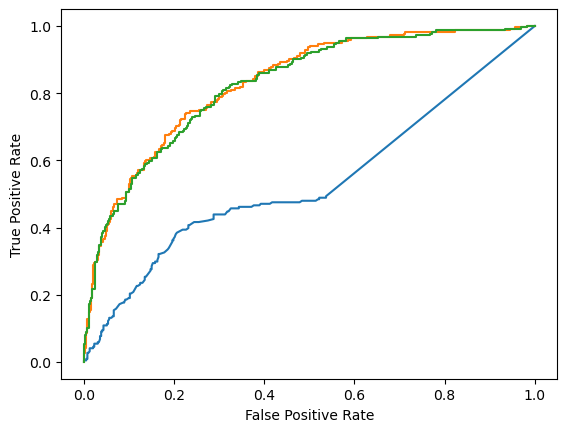

In [108]:
# Use roc_curve to get FPR and TPR for each of the 3 classifiers 
# ****** your code here ******
classifierOne = noPenaltyFitInsulin
classifierTwo = noPenaltyFit
classfierThree = penaltyFit

fpr1, tpr1, thresholds1 = roc_curve(ytrain, classifierOne.predict_proba(Xtrain[['Insulin']])[:,1])
fpr2, tpr2, thresholds2 = roc_curve(ytrain, classifierTwo.predict_proba(Xtrain)[:,1])
fpr3, tpr3, thresholds3 = roc_curve(ytrain, classfierThree.predict_proba(Xtrain)[:,1])

# Plot all of the ROC curves 
# ****** your code here ******
plt.plot(fpr1, tpr1, label='No Penalty Insulin')
plt.plot(fpr2, tpr2, label='No Penalty')
plt.plot(fpr3, tpr3, label='Penalty')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# Determine AUC for each of the ROC curves 
# ****** your code here ******
auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)
print('AUC for No Penalty Insulin:', auc1)
print('AUC for No Penalty:', auc2)
print('AUC for Penalty:', auc3)


Which one is the best classifier?

**Your answer**: 
The best classifier is classifier two: no penalty for all properties. This is beacuse the AUC is 0.831. The L2 penalty classifier is very close in performance with an AUC of 0.826.

## Question 5 [ _ /10 marks]

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. Use the same dataset to train a multiclass **Logistic Regression** using the [SGDClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)  with `l2` regularization. So, this time you will have 10 classes, *i.e.*, 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. For training use `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For some `sklearn` functions you can set argument `n_jobs=N` to run them in parallel and speed up computations. A good value for N can be the number of physical CPU cores that your machine possesses (`N=-1` would use all cores). Check the documentations of the functions to take advantage from this where possible.

First load the data and plot a histogram to comment on class distribution qualitatively. For splitting the data into train and test sets, use `test_size=0.5` and `random_state=seed`. What is the balanced accuracy score of your model?

c:\Users\Riley\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


SGDClassifier(max_iter=2000, n_jobs=-1, random_state=0)

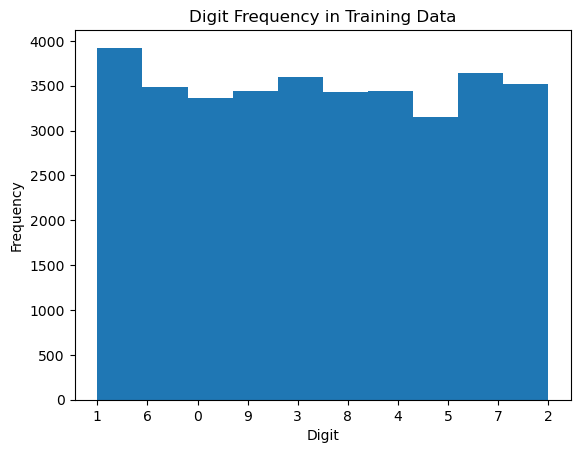

In [109]:
from sklearn.datasets import fetch_openml # a helper function to download popular datasets
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

X, y = mnist["data"], mnist["target"]

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.5, random_state=seed)

# Histogram of the data
plt.hist(ytrain, bins=10)
plt.xlabel('Digit')
plt.ylabel('Frequency')
plt.title('Digit Frequency in Training Data')

# Use SGDClassifier to train a model on the training data
model = SGDClassifier(random_state=seed, max_iter=2000, tol=1e-3, n_jobs=-1, penalty='l2')

# Fit the model to the training data
model.fit(Xtrain, ytrain)

In [110]:
# Get the balanced accuracy of the model
balanced_accuracy = cross_val_score(model, Xtrain, ytrain, cv=3, scoring='balanced_accuracy')
print('Balanced Accuracy:', balanced_accuracy)

Balanced Accuracy: [0.87355044 0.85676679 0.87369812]


**Your written answer**: 
The balanced accuracy of the model is [0.87355044 0.85676679 0.87369812]

## Question 6 [ _ /10 marks]

Run the cell below to see how well your model can recognize a digit drawn by the mouse cursor. Set the variable `final_model`, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the model's recognition of your input.

Despite the cell using your classifier, which has a high balanced accuracy score, it often makes mistakes and its performance seems questionable. Try to explain in words why is that so?

Caveat: The cell below will not run on headless servers, you will need to use a local installation of python. You might have some fun until you can get it to work, but that's ok, because I want you to try your hands on technicalities and not always rely on online services.

In [115]:
final_model=model # use the name of your final model
#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"
app = Tk()
app.geometry("300x300")
canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)
def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=4)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()
img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
# reshaping to support our model input
img = np.reshape(img, 28*28)

#predicting the class
print('\nInput recognized as ' + str(final_model.predict([img])[0])+'.')

Exception in Tkinter callback
Traceback (most recent call last):
  File "c:\Users\Riley\anaconda3\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\Riley\AppData\Local\Temp\ipykernel_33644\1327278555.py", line 24, in draw_smth
    img.save(temp_file_name)
  File "c:\Users\Riley\anaconda3\Lib\site-packages\PIL\Image.py", line 2376, in save
    self._ensure_mutable()
  File "c:\Users\Riley\anaconda3\Lib\site-packages\PIL\Image.py", line 573, in _ensure_mutable
    self._copy()
  File "c:\Users\Riley\anaconda3\Lib\site-packages\PIL\Image.py", line 566, in _copy
    self.load()
  File "c:\Users\Riley\anaconda3\Lib\site-packages\PIL\EpsImagePlugin.py", line 393, in load
    self.im = Ghostscript(self.tile, self.size, self.fp, scale, transparency)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Riley\anaconda3\Lib\site-packages\PIL\EpsImagePlugin.py", line 154, in Ghostscrip

FileNotFoundError: [Errno 2] No such file or directory: 'TEMP_image_TEMP.jpg'

**Your answer**: 